In [1]:
import numpy as np
import pandas as pd

pd.__version__


'2.3.1'

In [31]:
file_path = 'car_fuel_efficiency.csv'

df=pd.read_csv(file_path)
display(len(df))
#First overvuew of data
display(df.head())
#Column list
print(df.columns)

#Types
display(df.dtypes)
#Row size
print(df.shape[0])

#Clean data
# like series it also has the str method for doing string 
# manipulation what we can do now is to apply the same 
# string function to all column names
df.columns = df.columns.str.lower().str.replace(' ','_')
#display(df.head())



9704

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')


engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

9704


In [32]:
column_list=['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']
df=df[column_list]
#display(df2['fuel_efficiency_mpg'].tail())
print("Null column check")
display(df.isna().any())

Null column check


engine_displacement    False
horsepower              True
vehicle_weight         False
model_year             False
fuel_efficiency_mpg    False
dtype: bool

In [33]:
display(df['horsepower'].median())

np.float64(149.0)

In [39]:
#Data organization
'''
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

base=[x for x in df.columns]
mean=df_train['fuel_efficiency_mpg'].mean()
'''
def prepare_X(df):
    base=[x for x in df.columns]
    df_num = df[base]
    df_num = df_num.fillna(0)
    #df_num = df_num.fillna(mean)
    X = df_num.values
    return X
    
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [22]:
y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

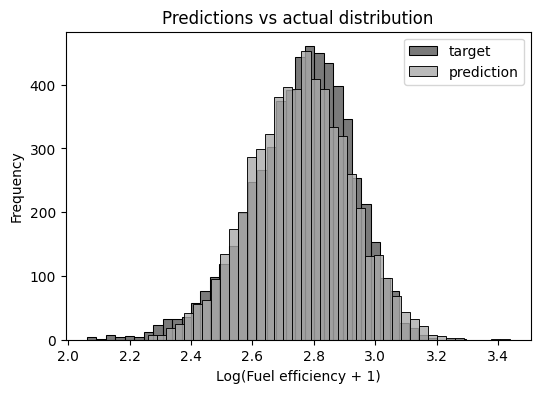

In [23]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Fuel efficiency + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [35]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)
    

In [26]:
y_pred = w_0 + X_train.dot(w)
print(rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

0.03886345791222734
validation: 0.03974206126178


In [22]:
#Zero 0.0399792578229878  
#Mean 0.03974206126178 Better

#Zero 0.5173782638841185
#Mean 0.5161906441748477 better

In [41]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]
y_predlist=[]
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression_reg(X_train, y_train, r)
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    
    print('validation', r, ":",rmse(y_val, y_pred))
    y_predlist.append([r,rmse(y_val, y_pred)])

validation 0 : 0.0399792578229878
validation 0.01 : 0.03997787201794628
validation 0.1 : 0.04050873984549153
validation 1 : 0.04135385150826845
validation 5 : 0.04150611823274443
validation 10 : 0.041526801237522025
validation 100 : 0.04154575656081158


In [38]:
display(y_predlist)
#validation 0.01 : 0.03997787201794628 Best

#validation 0.01 : 0.5171115525775559 Best

[[0, np.float64(0.03974206126178)],
 [0.01, np.float64(0.039740642916469365)],
 [0.1, np.float64(0.04027463008384845)],
 [1, np.float64(0.04112461615581577)],
 [5, np.float64(0.04127774217257117)],
 [10, np.float64(0.04129854147079755)],
 [100, np.float64(0.04131760378329314)]]

In [42]:
def shufflesplit_df(df,seed=0):
    np.random.seed(seed)
    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    return df_shuffled, df_train, df_val, df_test

def validate_df(df_train,df_val,df_test):
    y_train_orig = df_train.fuel_efficiency_mpg.values
    y_val_orig = df_val.fuel_efficiency_mpg.values
    y_test_orig = df_test.fuel_efficiency_mpg.values
    
    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

    return y_train_orig,y_val_orig,y_test_orig,y_train,y_val,y_test

seedlist=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmselist=[]
for seedx in seedlist:
    df_shuffled, df_train, df_val, df_test=shufflesplit_df(df,seedx)
    y_train_orig,y_val_orig,y_test,y_train,y_val,y_test=validate_df(df_train,df_val,df_test)
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred0 = w_0 + X_train.dot(w)

    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    score=rmse(y_val, y_pred)
    print('validation:', score)
    rmselist.append(score)



validation: 0.03801775537104819
validation: 0.039278853338995105
validation: 0.03944653052696821
validation: 0.038727637039551656
validation: 0.03727535850045066
validation: 0.039384388340472844
validation: 0.03890763931474179
validation: 0.03837971626919168
validation: 0.04018986975307275
validation: 0.038607646441651766


In [43]:
display(rmselist)
display("Standard deviation:", round(np.std(rmselist),3))

[np.float64(0.03801775537104819),
 np.float64(0.039278853338995105),
 np.float64(0.03944653052696821),
 np.float64(0.038727637039551656),
 np.float64(0.03727535850045066),
 np.float64(0.039384388340472844),
 np.float64(0.03890763931474179),
 np.float64(0.03837971626919168),
 np.float64(0.04018986975307275),
 np.float64(0.038607646441651766)]

'Standard deviation:'

np.float64(0.001)

In [54]:
seedlist2=[9]
for seedx in seedlist2:
    df_shuffled, df_train, df_val, df_test=shufflesplit_df(df,seedx)
    df_train2=pd.concat([df_train, df_val], axis=0)
    
    y_train_orig,y_val_orig,y_test_orig,y_train,y_val,y_test=validate_df(df_train2,df_val, df_test)
    
    del df_train2['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X(df_train2)
    w_0, w = train_linear_regression_reg(X_train, y_train,r=0.001)
    y_pred0 = w_0 + X_train.dot(w)

    X_test = prepare_X(df_test)
    y_pred = w_0 + X_test.dot(w)
    score=rmse(y_test, y_pred)
    print('Test:', score)
    rmselist.append(score)

Test: 0.03919613644482336
